# Functional analysis of single-cell transcriptomics: part one

# introduce what single cell and transcriptomics are

# Introduce dataset


## Loading packages

First, we need to load the relevant packages, `scanpy` to handle scRNA-seq data and decoupler to use statistical methods.

In [1]:
import scanpy as sc
import scanpy.external as sce
import decoupler as dc

# Only needed for processing and plotting
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
metadata = pd.DataFrame([
    ['control'],
    ['control'],
    ['control'],
    ['covid'],
    ['covid'],
    ['covid']],
    columns=['condition'],
    index=['control_a', 'control_b', 'control_c', 'covid_d', 'covid_e', 'covid_f']
)
metadata

,condition
control_a,control
control_b,control
control_c,control
covid_d,covid
covid_e,covid
covid_f,covid


Read 10x-Genomics-formatted mtx directory obtained from running the aligment tool called CellRanger to obtain an `AnnData` object:

In [2]:
adata = sc.read_10x_mtx('data/covid_e')
adata

FileNotFoundError: Did not find file data/covid_e/matrix.mtx.gz.

Inside an `AnnData` object we have different attributes, here are the most important ones:
* X: This is where the main assay is stored. At the beginning here are the raw integer gene counts
* obs: Metadata dataframe for cells (rows)
* var: Metadata dataframe for genes (columns)
* layers: Other assays with the same dimensions than X

You can read more about it in the official [documentation](https://anndata.readthedocs.io/en/latest/index.html)

<img src="https://anndata.readthedocs.io/en/latest/_images/anndata_schema.svg"
     width="400" 
     height="500" />

To visualize the cell metadata run:

In [4]:
adata.obs

""
SAMEA6979320-AAACCCATCATCGTAG
SAMEA6979320-AAAGAACGTGCCCACA
SAMEA6979320-AAAGGATGTCGTGATT
SAMEA6979320-AAAGGATGTGTCTAAC
SAMEA6979320-AAAGGGCGTAGGCTGA
...
SAMEA6979321-TTGTTGTAGATTCGCT
SAMEA6979321-TTTGACTCACATCATG
SAMEA6979321-TTTGACTGTGAAGCGT
SAMEA6979321-TTTGATCCAATAGTGA


For the gene metadata:

In [5]:
adata.var

,gene_ids,feature_types
TSPAN6,ENSG00000000003,Gene Expression
DPM1,ENSG00000000419,Gene Expression
SCYL3,ENSG00000000457,Gene Expression
C1orf112,ENSG00000000460,Gene Expression
FGR,ENSG00000000938,Gene Expression
...,...,...
ARHGAP11A-SCG5,ENSG00000288864,Gene Expression
PPIAL4C,ENSG00000288867,Gene Expression
RPSAP58,ENSG00000288920,Gene Expression
CTAGE8-1,ENSG00000289604,Gene Expression


And the expression matrix (in sparse format to save memory):

In [6]:
adata.X

<2471x18952 sparse matrix of type '<class 'numpy.float32'>'
	with 2784120 stored elements in Compressed Sparse Row format>

## Quality Control (QC)

Before analysing the single-cell gene expression data, we must ensure that all cellular barcode data correspond to viable cells.

First we need to apply a basic filtering where we remove cells (rows) with few expressed genes and genes (columns) with that are
expressed in few cells.

In [7]:
# Basic filtering
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

We can then compute quality control (QC) metrics:

* `total_counts`: Total number of UMI counts for each cell. Cells with big values might be doublets*
* `pct_counts_mt`: Percentage of expressed genes that are mitocondrial. A high percentage might indicate cell death
* `n_genes_by_counts`: Number of genes that have at least one UMI count. A low value means that the cell is empty

*Doublets (or multiplets) arise in scRNA-seq data when two (or more) cells are mistakenly considered as a single cell, due for instance to being captured and processed in the same droplet on a micro-fluidics device.

In [8]:
# Compute QC metrics
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

We can easly plot these metrics into scatterplots:

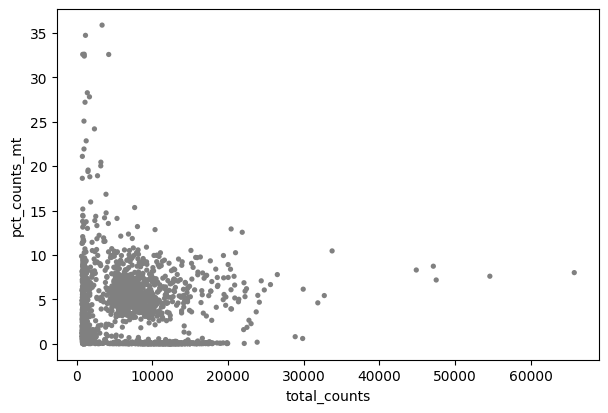

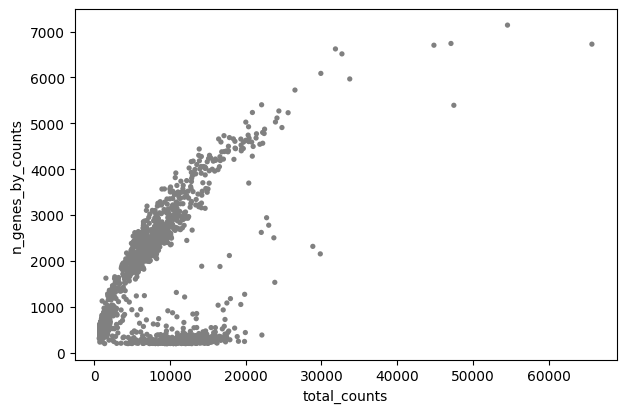

In [9]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

There seem to be some cells with higher levels of mitoconrial genes, we should remove them since these cells are not very
informative.

Moreover, it is always good to trim cells with too much number of genes expressed (`n_genes_by_counts`) because
most probably they are doublets.

We can filter our object based on these criteria:

In [10]:
# Filter cells
adata = adata[(adata.obs.n_genes_by_counts < 5000) & (adata.obs.n_genes_by_counts > 500), :]
adata = adata[adata.obs.pct_counts_mt < 15, :]
adata

View of AnnData object with n_obs × n_vars = 1430 × 16415
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

With our current relaxed filtering strategy we might still have doublets in our data which might bias downstream analyses. To
remove them, there are many methods that compute doublet scores, one of them being `scrublet`. We can compute doublets scores by:

In [11]:
# Compute doublets score
sce.pp.scrublet(adata, verbose=True)

/home/badi/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.36
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 35.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.8%


/home/badi/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/external/pp/_scrublet.py:227: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['doublet_score'] = adata_obs.obs['doublet_score']


`scrublet` computes a score that goes from 0 to 1, 1 being very probable that a cell is a doublet. We can plot the distirbution
of scores in a histogram:

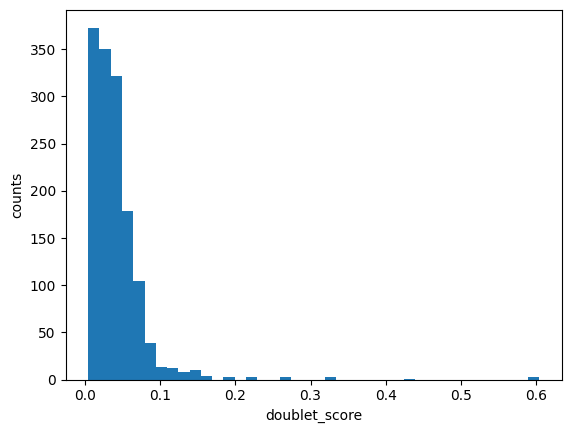

In [12]:
plt.hist(adata.obs['doublet_score'], bins=40)
plt.ylabel('counts')
plt.xlabel('doublet_score')
plt.show()

To remove outliers we can set a threshold at 0.2:

In [13]:
# Filter cells
adata = adata[adata.obs['doublet_score'] <= 0.2, :]
adata

View of AnnData object with n_obs × n_vars = 1417 × 16415
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'scrublet'

## Normalization

Each count in a count matrix represents the successful capture, reverse transcription and sequencing of a molecule of cellular mRNA. Count depths for identical cells can differ due to the variability inherent in each of these steps. Thus, when gene expression is compared between cells based on count data, any difference may have arisen solely due to sampling effects. Normalization addresses this issue by scaling count data to obtain correct relative gene expression abundances between cells.
The most used normalization technique is to normalize each cell by total counts over all genes, so that every cell has the same total count after normalization. Afterwards we multiply the normalized counts to the estimated library size (1e4) and we apply the log(x+1), which mitigates (but does not remove) the mean–variance relationship in single-cell data.

Before normalizing, we will store the raw integer counts into the `layers` attribute of our object

In [14]:
adata.layers['counts'] = adata.X.copy()

Then we normalize and log transform:

In [15]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

We can then store the results into another assay in the layers attribute:

In [16]:
adata.layers['logcounts'] = adata.X.copy()

## Feature selection

To identify different cell clusters in our data we first need to reduce their dimmensions by running principal component analysis (PCA) to reveal the main axes of variation and denoise the data. However before that we need to make a selection of features (genes) that maximize the differences between our cells. We can compute the Highly Variable Genes (HVG) by running this code:

In [17]:
sc.pp.highly_variable_genes(adata)

We can see which ones are flagged as HVG in the `var` attribute:

In [18]:
adata.var

,gene_ids,feature_types,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm
TSPAN6,ENSG00000000003,Gene Expression,3,False,3,0.001435,99.856528,3.000000,False,0.002877,0.412386,-0.922549
DPM1,ENSG00000000419,Gene Expression,381,False,381,0.266029,81.779053,556.267578,False,0.474737,1.598283,-0.314380
SCYL3,ENSG00000000457,Gene Expression,45,False,45,0.024390,97.847920,51.000000,True,0.078718,2.044813,1.156439
C1orf112,ENSG00000000460,Gene Expression,16,False,16,0.009565,99.234816,20.000000,True,0.023811,1.938041,1.020459
FGR,ENSG00000000938,Gene Expression,240,False,240,0.237207,88.522238,496.000000,False,0.609669,2.105544,0.374901
...,...,...,...,...,...,...,...,...,...,...,...,...
H2AC18,ENSG00000288825,Gene Expression,1095,False,1095,1.325030,47.632712,2770.637939,True,2.374176,3.735275,0.630131
H2AC19,ENSG00000288859,Gene Expression,1095,False,1095,1.327900,47.632712,2776.637695,True,2.378414,3.735636,0.630474
ARHGAP11A-SCG5,ENSG00000288864,Gene Expression,24,False,24,0.002989,98.852224,6.250000,False,0.008648,0.301868,-1.063300
RPSAP58,ENSG00000288920,Gene Expression,439,False,439,0.594093,79.005261,1242.248047,True,0.823622,2.528338,0.891966


## Dimensionality reduction

Once we have a set of genes that account for the most variability in our data, we can scale our features and apply PCA.

In [19]:
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')

The obtained PCs are stored in the `obsm` attribute:

In [20]:
adata.obsm['X_pca']

array([[ -1.9682444 ,  -9.480983  ,  29.57738   , ...,   1.2646086 ,
          1.2882497 ,   1.514131  ],
       [ -6.7481256 , -10.97887   ,  -2.5459614 , ...,  -5.8227305 ,
         -7.0402856 ,   0.8685303 ],
       [ -1.4002874 ,   9.225351  ,  -2.583631  , ...,  -0.20838846,
          0.7071866 ,  -2.3981788 ],
       ...,
       [ -1.7155488 ,   7.5928307 ,  -2.6431992 , ...,   0.03813709,
          0.6193293 ,  -1.4797611 ],
       [  1.1164954 ,   7.9159613 ,   0.27475893, ...,   0.36533725,
         -0.9630526 ,   0.86469907],
       [ -2.3300912 ,   0.21925269,   5.4236093 , ...,   1.4307058 ,
          3.6100225 ,  -0.740912  ]], dtype=float32)

## Visualization

For visualization purposes, it is standard practice to use non-linear dimensionality reduction methods, for example Uniform Approximation and Projection method (UMAP).

To run UMAP, first we need to compute a neighbouring graph between cells from the PCs space and them run the algorithm:

In [21]:
# Compute neighbours and UMAP embedding
sc.pp.neighbors(adata)
sc.tl.umap(adata)

We can then find clusters in the neighbour graph which hopefully will belong to different cell types. To find clusters there
are different algorithms available, here we will use the leiden algorithm:

In [22]:
# Find clusters in the NN graph
sc.tl.leiden(adata)

We can visualize the obtained clusters in the UMAP embedding. We can also plot the expression of genes into the UMAP,
for example CD40, a known marker gene for B cells:

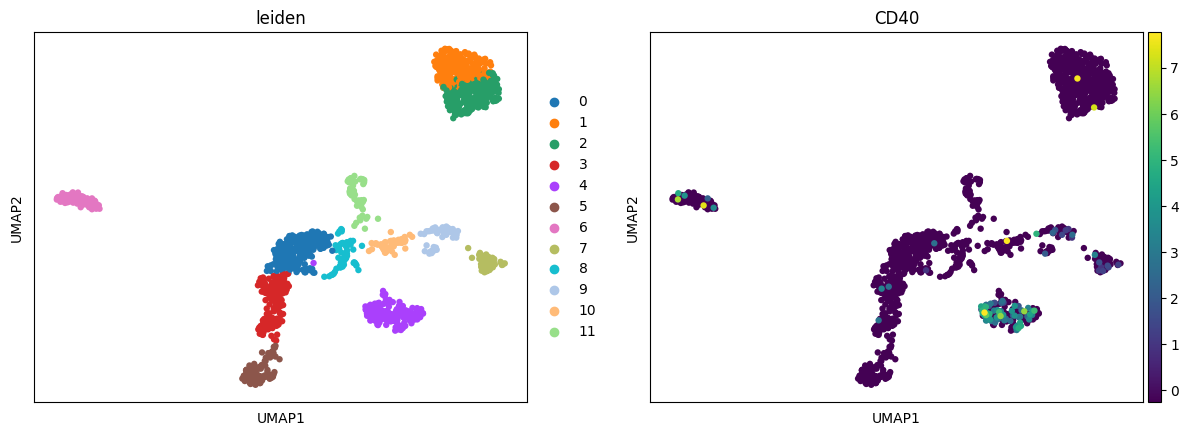

In [23]:
# Visualize UMAP
sc.pl.umap(adata, color=['leiden','CD40'])

## Annotation

Identifying and annotating clusters relies on using external sources of information describing the expected expression profiles of individual cell identities. To do so, we need to identify first marker gene sets by applying differential expression (DE) testing between two groups: the cells in one cluster and all other cells in the dataset.

As marker genes are expected to have strong differential expression effects, simple statistical tests such as the t-test are often used to rank genes by their difference in expression between these two groups. The top-ranked genes from the respective test statistic are regarded as marker genes. Then, clusters can be annotated by comparing marker genes from the dataset and marker genes from prior knowledge.

To compute marker genes run:

In [24]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test', layer='logcounts')

We can extract the results as a dataframe with the following function:

In [25]:
df = sc.get.rank_genes_groups_df(adata, group=None)
df

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,RPL10P9,47.840103,4.417025,2.337991e-272,1.918906e-268
1,0,RPS26,47.145580,3.843513,4.299389e-284,7.057446e-280
2,0,RPS4X,44.183022,3.756203,2.936766e-267,1.606900e-263
3,0,RPSA,43.324078,3.474862,4.153952e-257,1.363743e-253
4,0,RPL3,42.828316,3.598168,1.061717e-257,4.357023e-254
...,...,...,...,...,...,...
196975,11,HLA-B-1,-27.198971,-5.203093,6.029800e-88,7.613782e-85
196976,11,HLA-E-2,-27.750515,-4.556638,1.892820e-44,1.538150e-42
196977,11,TAPBP-2,-28.730949,-6.227632,6.049096e-135,9.929591e-131
196978,11,SMCHD1,-29.573252,-5.020846,2.724810e-59,6.127089e-57


We can then visualize the top 3 identified marker genes per cluster using a dotplot:

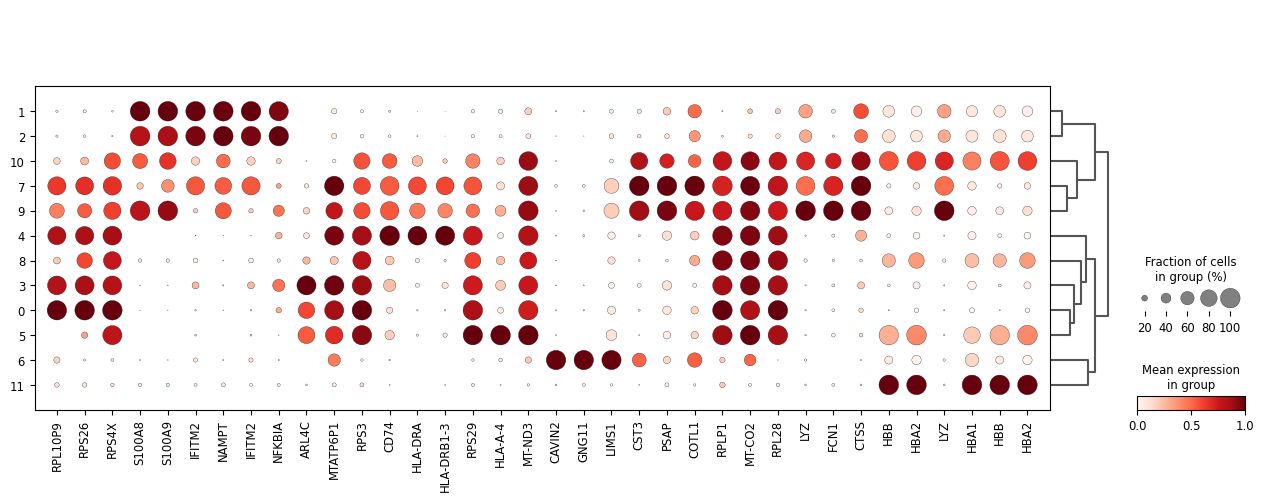

In [26]:
markers = df.groupby('group').head(3)['names'].values
sc.pl.dotplot(adata, var_names=markers, groupby='leiden', dendrogram=True, standard_scale='var')

Some clusters show well known marker genes for immune cell types. If we take a closer look we can manually annotate the obtained
clusters. Note that it is possible that some clusters might be annotated as the same cell type if their marker genes overlap.

In [27]:
annotation_dict = {
 '0': 'T cells',
 '1': 'Neutrophils',
 '2': 'Neutrophils',
 '3': 'T cells',
 '4': 'B cells',
 '5': 'T cells',
 '6': 'Platelets',
 '7': 'Monocytes',
 '8': 'T cells',
 '9': 'Monocytes',
 '10': 'Dendritic cells',
 '11': 'Erythroid-like and erythroid precursor cells',
}

Then, we can add a metadata column with the annotated cell types and visualize the results:

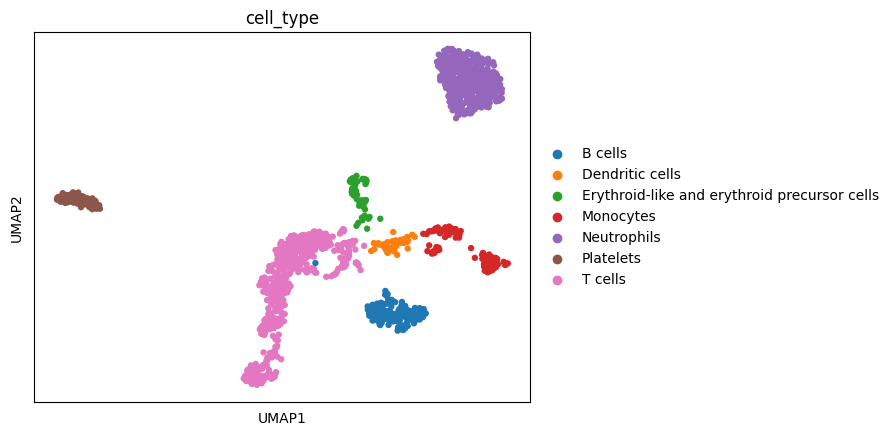

In [28]:
# Add cell type column based on annotation
adata.obs['cell_type'] = [annotation_dict[clust] for clust in adata.obs['leiden']]

# Visualize
sc.pl.umap(adata, color='cell_type')

## Integration

Up until one we were working with just one of the samples in our dataset. To be able to make comparisons between healthy and
disease patients we need to process the other samples and merge them together.

We will read the different samples, apply the previously explained QC steps and normalization, and merge all cells into one single
object. To achieve this, we will define some functions that perform the mentioned steps:

In [24]:
def qc_sample(sample_id):
    """
    Reads and performs QC on a given sample.
    """

    # Read
    adata = sc.read_10x_mtx(os.path.join('data', sample_id))

    # Basic filtering
    sc.pp.filter_cells(adata, min_genes=200)
    sc.pp.filter_genes(adata, min_cells=3)

    # Compute QC metrics
    adata.var['mt'] = adata.var_names.str.startswith('MT-')
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

    # Filter cells
    adata = adata[(adata.obs.n_genes_by_counts < 5000) & (adata.obs.n_genes_by_counts > 500), :]
    adata = adata[adata.obs.pct_counts_mt < 15, :]

    # Compute doublets score
    sce.pp.scrublet(adata, verbose=False)

    # Filter cells
    adata = adata[adata.obs['doublet_score'].values <= 0.2, :]

    return adata

def norm_sample(adata):
    """
    Normalizes, transforms and stores counts.
    """

    # Store raw counts
    adata.layers['counts'] = adata.X.copy()

    # Normalize and log transform
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)

    # Store logcounts
    adata.layers['logcounts'] = adata.X.copy()

    return adata

In [ ]:
# Init empty adata
adata = []

# Iterate samples
for sample_id in metadata.index:

    print(sample_id)

    # QC and normalize sample
    s_adata = qc_sample(sample_id)
    s_adata = norm_sample(s_adata)

    # Add metadata
    s_adata.obs['sample_id'] = sample_id
    s_adata.obs['condition'] = metadata.loc[sample_id, 'condition']
    
    # Add to rest
    adata.append(s_adata)

# Merge adatas into one
adata = adata[0].concatenate(adata[1:], join="outer")

We can notice that now in the `obs` we see we have different samples and conditions:

In [25]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,doublet_score,predicted_doublet,sample_id,condition,batch,leiden,cell_type
SAMEA6979313-AAAGAACCACCTGCTT-0,2467,2462,8641.469727,672.979980,7.787796,0.037037,False,control_a,control,0,2,T cells
SAMEA6979313-AAAGGGTGTCCCTCAT-0,1063,1062,1761.198730,33.000000,1.873724,0.011820,False,control_a,control,0,5,Dendritic cells
SAMEA6979313-AACAGGGAGATCACTC-0,2864,2859,8712.615234,748.942871,8.596075,0.124424,False,control_a,control,0,1,T cells
SAMEA6979313-AACCAACGTGTGAGCA-0,4126,4122,16802.511719,995.628357,5.925473,0.085911,False,control_a,control,0,1,T cells
SAMEA6979313-AACCCAAAGTATGATG-0,2723,2715,9438.226562,580.937500,6.155155,0.054726,False,control_a,control,0,3,T cells
...,...,...,...,...,...,...,...,...,...,...,...,...
SAMEA6979322-TTGTTTGCACACACTA-5,2955,2927,11675.593750,560.390381,4.799674,0.073171,False,covid_f,covid,5,2,T cells
SAMEA6979322-TTGTTTGGTACGATGG-5,1807,1799,3762.827637,80.352943,2.135441,0.031161,False,covid_f,covid,5,10,T cells
SAMEA6979322-TTTACTGCAAGCGAAC-5,4128,4097,12357.002930,676.806030,5.477105,0.013972,False,covid_f,covid,5,7,Monocytes
SAMEA6979322-TTTGATCCAATAGTGA-5,4493,4464,16647.265625,931.898315,5.597906,0.017241,False,covid_f,covid,5,7,Monocytes


Like before, we need to find HVG. In this case, we will compute them per sample and then select the top 3000 genes that are HVG
across as many samples as possible:

In [31]:
# Compute HVG
sc.pp.highly_variable_genes(adata, batch_key='batch', layer='logcounts')

# Filter by HVG
num_hvg_genes = 3000
batch_msk = np.array(adata.var['highly_variable_nbatches'] > 1)
hvg = adata.var[batch_msk].sort_values('highly_variable_nbatches').tail(num_hvg_genes).index
adata.var['highly_variable'] = [g in hvg for g in adata.var.index]

/home/badi/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:475: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/home/badi/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:475: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/home/badi/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:475: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/home/badi/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_ge

Once we find HVG that are representative in all samples, we can scale and compute PCA on them.

In [32]:
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')

# Remove scaled counts and put back logcounts
adata.X = adata.layers['logcounts'].copy()

The next step would be to perform UMAP but we need to consider batch effects.
Batch effects can occur when cells are handled in distinct groups. These groups can consist of cells on different chips, cells in different sequencing lanes or cells harvested at different time points. The differing environments experienced by the cells can have an effect on the measurement of the transcriptome or on the transcriptome itself.

To correct for these effects we need to integrate the samples by correcting by technical effects. Different methods of integration
exists, all of them work on correcting the cell embeddings (not directly on the gene expression) to regress this unwanted variability.
As an example we will use `harmony` which modifies the PCs into comparable features across batches:

In [33]:
sce.pp.harmony_integrate(adata, 'batch', max_iter_harmony=30)

2022-09-16 00:30:58,500 - harmonypy - INFO - Iteration 1 of 30
2022-09-16 00:31:00,336 - harmonypy - INFO - Iteration 2 of 30
2022-09-16 00:31:01,926 - harmonypy - INFO - Iteration 3 of 30
2022-09-16 00:31:03,746 - harmonypy - INFO - Iteration 4 of 30
2022-09-16 00:31:04,655 - harmonypy - INFO - Iteration 5 of 30
2022-09-16 00:31:05,345 - harmonypy - INFO - Converged after 5 iterations


Once we have the corrected PCs, we can compute NN and the UMAP embedding:

In [34]:
# Compute neighbours and UMAP embedding
sc.pp.neighbors(adata)
sc.tl.umap(adata)

We can also find clusters:

In [35]:
# Find clusters in the NN graph
sc.tl.leiden(adata)

Here we visualize the obtained clusters, the original sample ids and their condition:

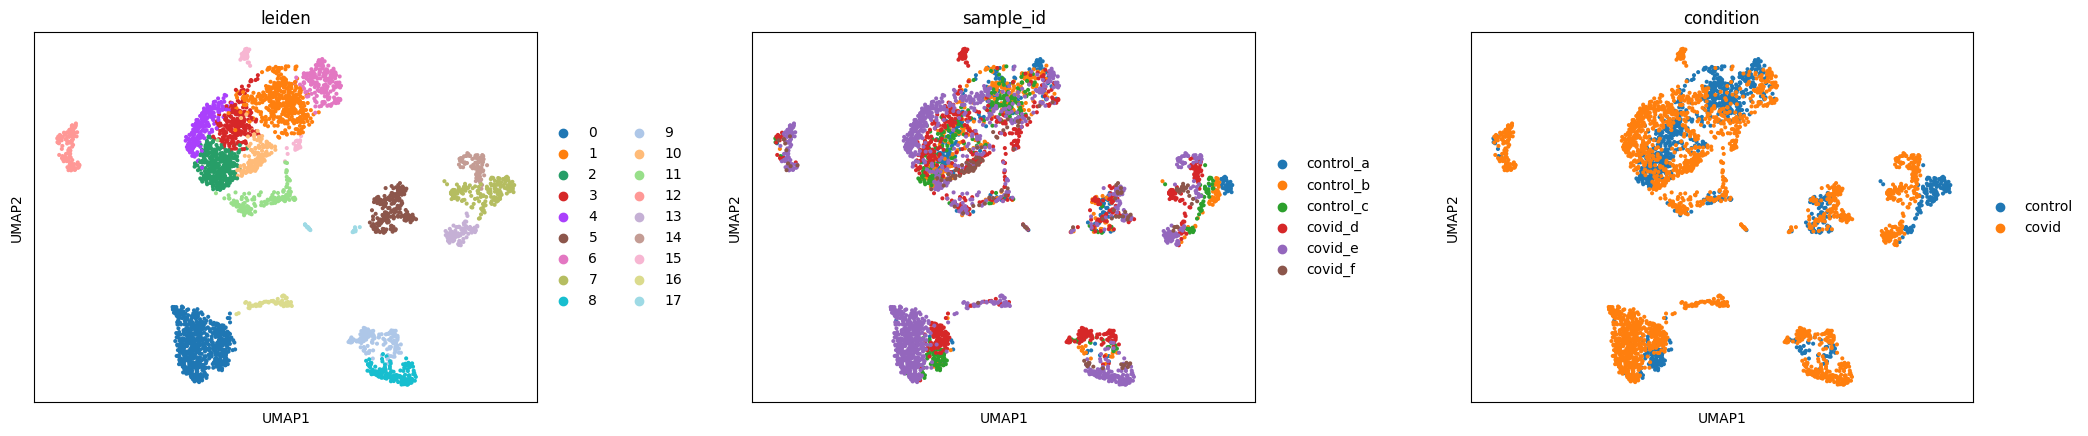

In [36]:
# Visualize UMAP
sc.pl.umap(adata, color=['leiden', 'sample_id', 'condition'], wspace=0.3)

We can observe that almost all defined clusters seem to come from multiple samples, meaning that the integration worked.

## Automatic cell type annotation

Before we showed that if we look at the marker genes of a given cluster, we could manually annotate the cell clusters with known
marker genes. This process if done manually over dozens of clusters can become tedious but it can become automated with the use
of gene sets.

Gene sets are groups of genes that can be associated to a biological term such as pathways, diseases or in this case cell types.

Thanks to recent and ongoing efforts such as the mouse brain atlas (Zeisel et al, 2018) or the Human Cell Atlas (Regev et al, 2017), reference databases are increasingly becoming available. One of them is PanglaoDB, a database of markers for human and mouse.

We can access PanglaoDB trough OmniPath, a meta-resource of databases, and filter it by canonical human genes:

In [37]:
# Retrieve database
panglaodb = dc.get_resource('PanglaoDB')

# Filter by canonical_marker and human
panglaodb = panglaodb[(panglaodb['human']=='True') & (panglaodb['canonical_marker']=='True')]

# Remove duplicated entries
panglaodb = panglaodb[~panglaodb.duplicated(['cell_type', 'genesymbol'])]
panglaodb

,genesymbol,canonical_marker,cell_type,germ_layer,human,human_sensitivity,human_specificity,mouse,mouse_sensitivity,mouse_specificity,ncbi_tax_id,organ,ubiquitiousness
1,CTRB1,True,Acinar cells,Endoderm,True,1.0,0.000628931,True,0.957143,0.0159201,9606,Pancreas,0.017
2,KLK1,True,Acinar cells,Endoderm,True,0.833333,0.00503145,True,0.314286,0.0128263,9606,Pancreas,0.013
5,KLK1,True,Principal cells,Mesoderm,True,0.0,0.00814536,True,0.285714,0.0140583,9606,Kidney,0.013
7,KLK1,True,Plasmacytoid dendritic cells,Mesoderm,True,0.0,0.00820189,True,1.0,0.0129136,9606,Immune system,0.013
8,KLK1,True,Endothelial cells,Mesoderm,True,0.0,0.00841969,True,0.0,0.0149153,9606,Vasculature,0.013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8472,SLC14A1,True,Urothelial cells,Mesoderm,True,0.0,0.0181704,True,0.0,0.0,9606,Urinary bladder,0.008
8473,UPK3A,True,Urothelial cells,Mesoderm,True,0.0,0.0,True,0.0,0.0,9606,Urinary bladder,0.0
8474,UPK1A,True,Urothelial cells,Mesoderm,True,0.0,0.0,True,0.0,0.0,9606,Urinary bladder,0.0
8475,UPK2,True,Urothelial cells,Mesoderm,True,0.0,0.0,True,0.0,0.0,9606,Urinary bladder,0.0


We can then use the framework `decoupler` to perform Over Representation Analysis and enrich each cell for cell type annotations:

In [38]:
dc.run_ora(mat=adata, net=panglaodb, source='cell_type', target='genesymbol', min_n=3, verbose=True, use_raw=False)

8 features of mat are empty, they will be removed.
Running ora on mat with 3467 samples and 17237 targets for 128 sources.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3467/3467 [00:06<00:00, 554.28it/s]
/home/badi/miniconda3/envs/scanpy/lib/python3.10/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


We can then extract the enrichment scores into a new object:

In [39]:
acts = dc.get_acts(adata, 'ora_estimate')

Let us visualize some of the enrichments:

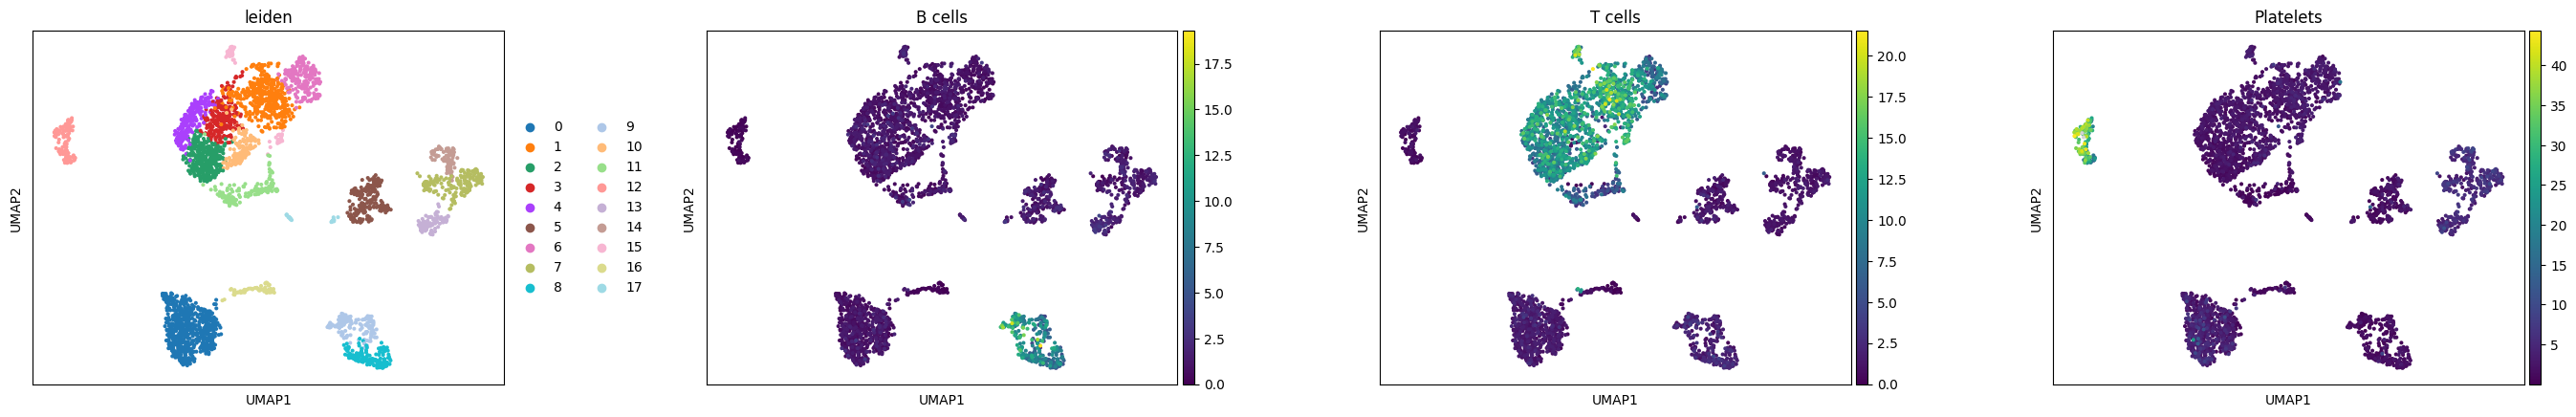

In [40]:
# Visualize UMAP
sc.pl.umap(acts, color=['leiden', 'B cells', 'T cells', 'Platelets'], wspace=0.3)

We can also extract the mean enrichment per cluster and visualize it as a clustermap:

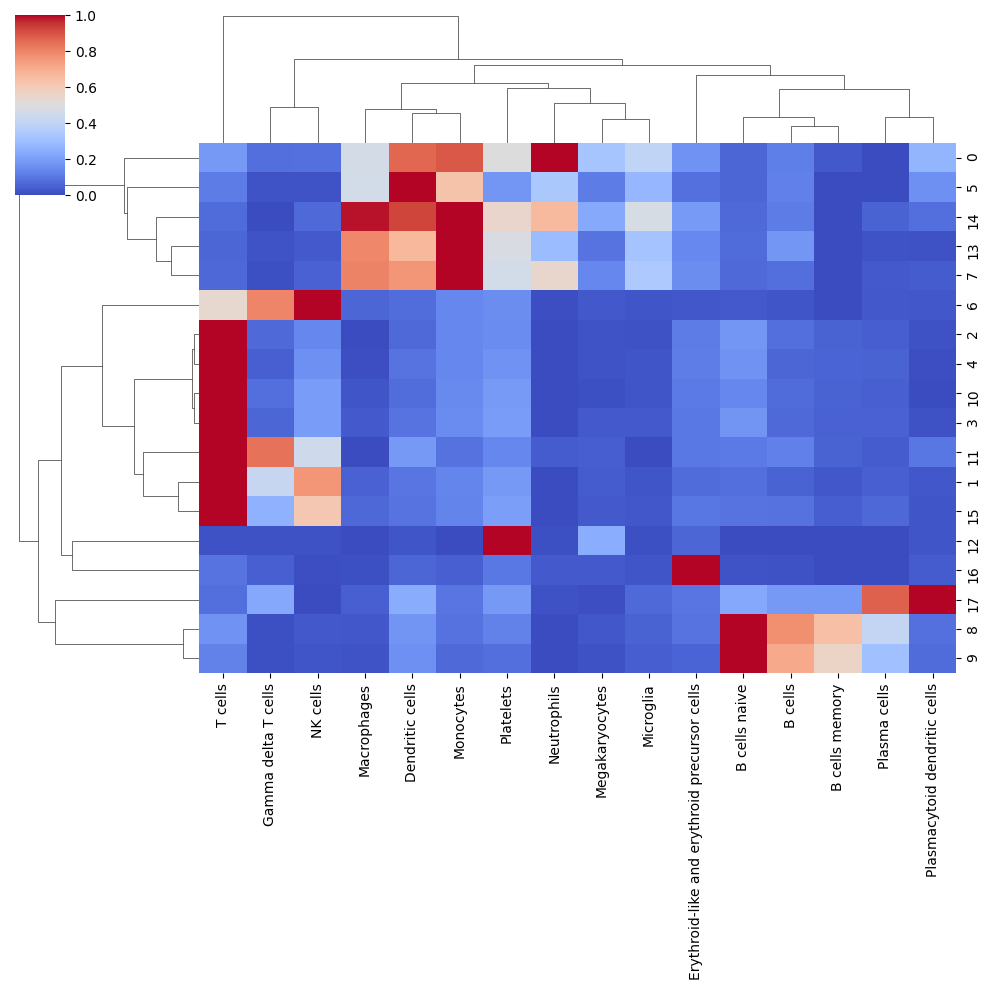

In [41]:
mean_enr = dc.summarize_acts(acts, groupby='leiden', min_std=1)
sns.clustermap(mean_enr, xticklabels=mean_enr.columns, cmap='coolwarm', standard_scale=0)
plt.show()

We can manually annotate the clusters based on the enrichment, or we can use a function from `decoupler` that selects the
most enriched annotation per cluster:

In [42]:
# Automatically select top predicted cell type per cluster
annotation_dict = dc.assign_groups(mean_enr)
annotation_dict

{'0': 'Neutrophils',
 '1': 'T cells',
 '10': 'T cells',
 '11': 'T cells',
 '12': 'Platelets',
 '13': 'Monocytes',
 '14': 'Monocytes',
 '15': 'T cells',
 '16': 'Erythroid-like and erythroid precursor cells',
 '17': 'Plasmacytoid dendritic cells',
 '2': 'T cells',
 '3': 'T cells',
 '4': 'T cells',
 '5': 'Dendritic cells',
 '6': 'NK cells',
 '7': 'Monocytes',
 '8': 'B cells naive',
 '9': 'B cells naive'}

With the new annotation we can update the cell metadata and visualize

In [19]:
# Add cell type column based on annotation
adata.obs['cell_type'] = [annotation_dict[clust] for clust in adata.obs['leiden']]

# Visualize
sc.pl.umap(adata, color='cell_type')

AttributeError: 'list' object has no attribute 'obs'

## Differential Expression Analysis (DEA)

Now that we have our atlas annotated, we can start looking at differences between our disease and healthy samples.
To do so, we will apply statistics to identify which genes are changing the most. To minimise sampling effects, we will perform
the test at the pseudobulk level, which is the colapsing of molecular readouts coming from one sample in a given cell type into
one single profile.

To compute pseudobulk profiles we can use `decoupler`:

In [26]:
# Get pseudo-bulk profile
padata = dc.get_pseudobulk(adata, sample_col='sample_id', groups_col='cell_type', layer='counts', min_prop=0.2, min_smpls=3)

# Normalize
sc.pp.normalize_total(padata, target_sum=1e4)
sc.pp.log1p(padata)
padata

/home/dbdimitrov/anaconda3/lib/python3.8/site-packages/decoupler/utils_anndata.py:258: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  psbulk = AnnData(psbulk, obs=new_obs, var=new_var)
/home/dbdimitrov/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


AnnData object with n_obs × n_vars = 32 × 7365
    obs: 'sample_id', 'condition', 'batch', 'cell_type'
    uns: 'log1p'

Once we have generated robust pseudo-bulk profiles for each sample and cell type, we can run any statistical test to compute DEA. For this example we will use t-test as is implemented in scanpy but we could use any other.

In [27]:
logFCs, pvals = dc.get_contrast(padata,
                                group_col='cell_type',
                                condition_col='condition',
                                condition='covid',
                                reference='control',
                                method='t-test'
                               )
logFCs

,A1BG,AAGAB,AAK1,AAMP,AAR2,AARS1,AARS2,AATF,AATF-1,ABCB1,...,ZRANB2,ZRSR2,ZSCAN2,ZSWIM6,ZSWIM7,ZSWIM8,ZXDC,ZYG11B,ZYX,ZZEF1
B cells naive,-0.695756,0.00000,-1.181385,0.000000,0.000000,0.636842,-0.194534,-0.111884,0.000000,0.000000,...,-0.089550,0.006110,0.000000,0.000000,0.000000,0.000000,0.000000,0.965155,0.000000,0.228279
Dendritic cells,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Monocytes,-0.150854,-0.30146,0.290070,0.330853,1.255615,0.634714,0.537959,-0.583964,0.024772,0.000000,...,0.266832,0.146210,0.254742,0.111009,0.051165,0.404000,0.153299,0.512849,0.451267,0.145024
NK cells,0.000000,0.00000,-0.040727,0.000000,0.000000,0.000000,0.000000,0.047430,0.000000,-0.150639,...,0.294128,-0.343749,0.000000,0.000000,0.000000,0.195674,0.000000,0.156584,0.000000,-0.121702
Neutrophils,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014061
T cells,-0.360406,0.00000,-0.216832,0.000000,0.000000,0.479775,0.000000,-0.157460,-0.113927,0.000000,...,-0.002940,0.061071,0.000000,0.000000,0.054785,0.000000,0.000000,0.312430,0.483740,0.126552


We can transform these results into a dataframe and store them for future use:

In [28]:
deg = dc.format_contrast_results(logFCs, pvals)
deg.to_csv('deg.csv', index=False)
deg

,contrast,name,logFC,pval
0,B cells naive,RBM34,1.174709,0.000041
1,Monocytes,PTGIR,-1.000088,0.000062
2,Monocytes,SINHCAF-1,-0.592931,0.000190
3,Monocytes,PGRMC1,1.307524,0.000192
4,T cells,PRPS1,0.589050,0.000285
...,...,...,...,...
44185,B cells naive,PDE4D,0.000000,1.000000
44186,NK cells,DOK3,0.000000,1.000000
44187,Neutrophils,PDE4C,0.000000,1.000000
44188,T cells,DOK3,0.000000,1.000000


We can also visualize the results as a volcano plot:

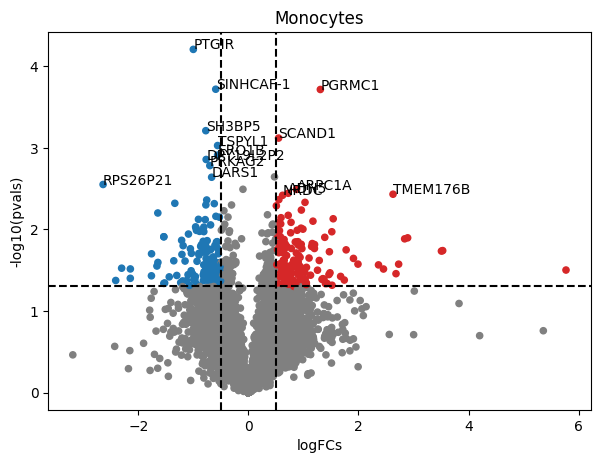

In [29]:
dc.plot_volcano(logFCs, pvals, 'Monocytes', top=15, sign_thr=0.05, lFCs_thr=0.5)

Remove duplicated gene that causes issues when converting to Seurat

In [23]:
adata = sc.read_h5ad("data/adata.h5ad")

In [6]:
adata = adata[:,~np.isin(adata.var.index, ["C4B-2", "C4B_2"])]

In [15]:
adata.write_h5ad("data/adata.h5ad")

## Transcription factor and cytokine activity estimation from prior-knowledge footprints

While some of these genes might be informative, it is rather hard to make a biological interpretation of what is going on.